# Analysing risk for top Renewable Energy firms
The **Renewable Energy** sector focuses on sustainable and environmentally friendly energy sources such as solar, wind, and hydrogen.

### Companies Evaluated:
1.	**First Solar, Inc. (FSLR):**
A leader in solar panel manufacturing, First Solar specializes in thin-film technology, offering cost-effective solutions for large-scale installations.
2.	**NextEra Energy, Inc. (NEE):**
A diversified energy company, NextEra Energy is the world's largest producer of wind and solar energy, with significant investments in renewable power projects.
3.	**Plug Power Inc. (PLUG):**
A pioneer in hydrogen fuel cell technology, Plug Power focuses on providing clean energy solutions for transportation and industrial applications.

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
companies = ['FSLR', 'NEE', 'PLUG']
start_date = "2023-01-01"
end_date = "2024-12-31"

In [26]:
data = {}
for company in companies:
    ticker = yf.Ticker(company)
    data[company] = ticker.history(start=start_date, end=end_date)

In [27]:
combined_data = pd.concat([df.assign(Company=company) for company, df in data.items()])
combined_data.reset_index(inplace=True)

In [28]:
print(combined_data.head())

                       Date        Open        High         Low       Close  \
0 2023-01-03 00:00:00-05:00  151.009995  152.449997  144.729996  145.940002   
1 2023-01-04 00:00:00-05:00  146.649994  147.809998  145.000000  146.779999   
2 2023-01-05 00:00:00-05:00  145.600006  147.020004  141.809998  145.460007   
3 2023-01-06 00:00:00-05:00  148.199997  157.160004  147.500000  156.800003   
4 2023-01-09 00:00:00-05:00  157.550003  162.350006  155.139999  159.169998   

    Volume  Dividends  Stock Splits Company  
0  1902300        0.0           0.0    FSLR  
1  2137700        0.0           0.0    FSLR  
2  1868500        0.0           0.0    FSLR  
3  2868300        0.0           0.0    FSLR  
4  2418300        0.0           0.0    FSLR  


In [29]:
combined_data['Year'] = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month

- **Extracting Financial Data**

In [30]:
financial_metrics = {
    'Company': [],
    'Revenue': [],
    'ROE': [],
    'Debt-to-Equity': []
}

for company in companies:
    financials = yf.Ticker(company).info
    financial_metrics['Company'].append(company)
    financial_metrics['Revenue'].append(financials.get('totalRevenue', 'N/A'))
    financial_metrics['ROE'].append(financials.get('returnOnEquity', 'N/A'))
    financial_metrics['Debt-to-Equity'].append(financials.get('debtToEquity', 'N/A'))

financial = pd.DataFrame(financial_metrics)

financial

,Company,Revenue,ROE,Debt-to-Equity
0,FSLR,3850810880,0.17964,9.141
1,NEE,26246000640,0.09888,139.015
2,PLUG,659505024,-0.43180,30.654


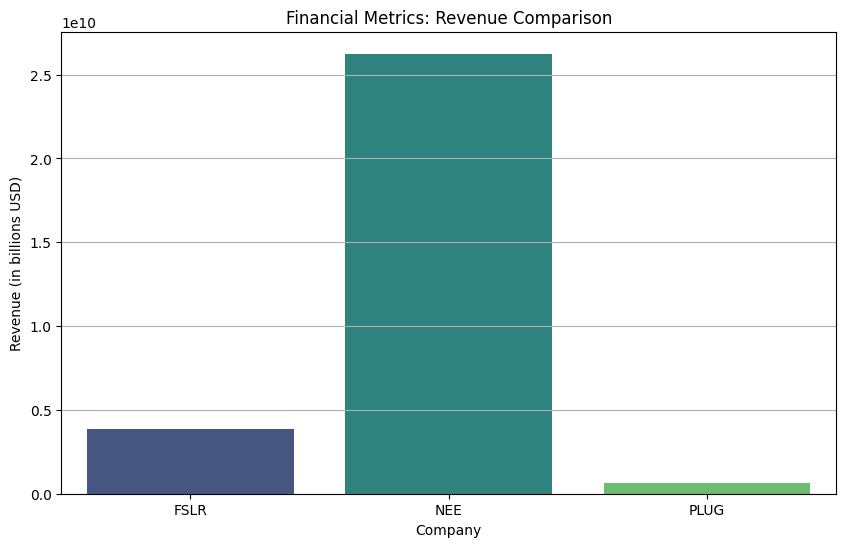

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=financial, x='Company', y='Revenue', palette='viridis')
plt.title('Financial Metrics: Revenue Comparison')
plt.xlabel('Company')
plt.ylabel('Revenue (in billions USD)')
plt.grid(axis='y')
plt.show()

The chart above reveals a significant revenue disparity among the companies, with NextEra Energy dominating the trio, followed by First Solar and then Plug Power taking the tail, highlighting NEE's substantial market presence.

# Risk Analysis

In [32]:
combined_data['Daily_Return'] = combined_data.groupby('Company')['Close'].pct_change()

In [33]:
risk_data = combined_data.groupby('Company')['Daily_Return'].std().reset_index()
risk_data.columns = ['Company', 'Risk (Volatility)']
print("\nFinancial Risk (Volatility)")
risk_data


Financial Risk (Volatility)


,Company,Risk (Volatility)
0,FSLR,0.033634
1,NEE,0.016971
2,PLUG,0.058953


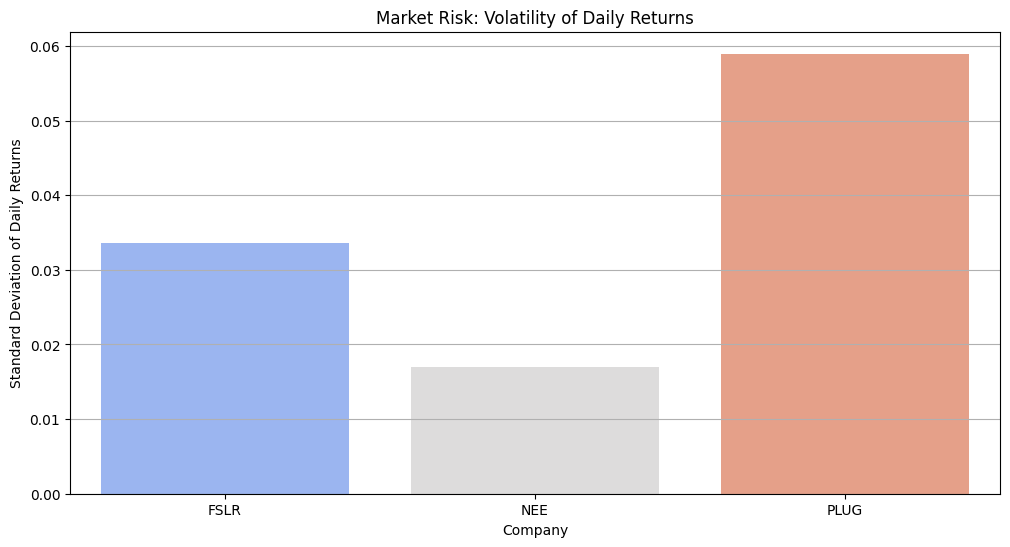

In [34]:
risk_data = combined_data.groupby('Company')['Daily_Return'].std().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=risk_data, x='Company', y='Daily_Return', palette='coolwarm')
plt.title('Market Risk: Volatility of Daily Returns')
plt.xlabel('Company')
plt.ylabel('Standard Deviation of Daily Returns')
plt.grid(axis='y')
plt.show()

This bar chart depicts the standard deviation of daily returns for FSLR, NEE, and PLUG, a measure of market risk. 
Here, FSLR exhibits the least volatility (0.0336), followed by NEE (0.0170) and PLUG (0.0589). 
FSLR is exposed to less market risk compared to the other two companies.

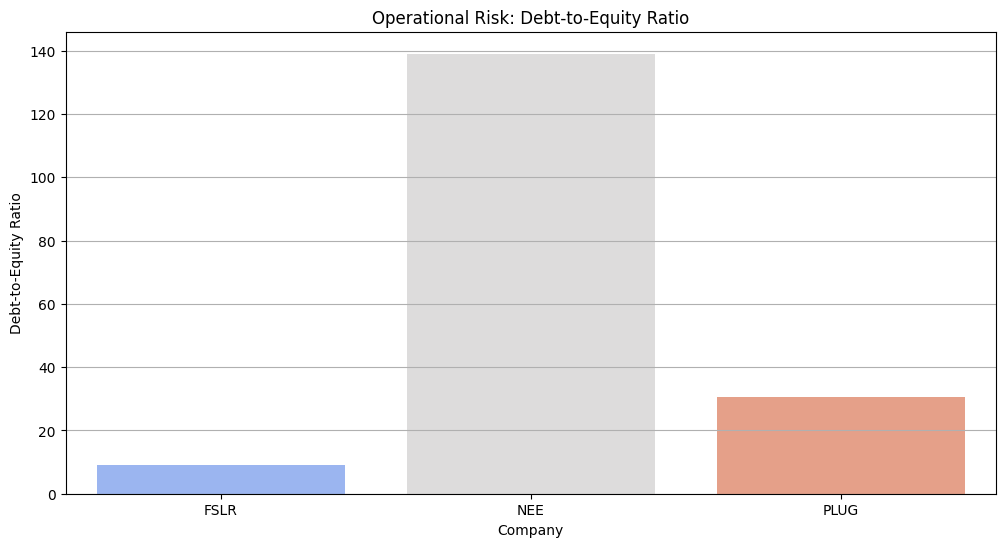

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=financial, x='Company', y='Debt-to-Equity', palette='coolwarm')
plt.title('Operational Risk: Debt-to-Equity Ratio')
plt.xlabel('Company')
plt.ylabel('Debt-to-Equity Ratio')
plt.grid(axis='y')
plt.show()

This bar chart compares the Debt-to-Equity (D/E) ratio of the companies. 
A higher D/E ratio indicates greater reliance on debt financing, potentially increasing vulnerability to economic downturns. 
Here, NEE has the highest D/E ratio (139.015), followed by PLUG (30.654) and FSLR (9.14). NEE faces the most significant operational risk from its high debt burden.

# Performance Comparison

In [36]:
average_price = combined_data.groupby(['Company', 'Year'])['Close'].mean().reset_index()
print("\nAverage Stock Price by Year")
average_price


Average Stock Price by Year


,Company,Year,Close
0,FSLR,2023,179.963000
1,FSLR,2024,199.546733
2,NEE,2023,67.047265
3,NEE,2024,70.930470
4,PLUG,2023,9.586760
5,PLUG,2024,2.741155


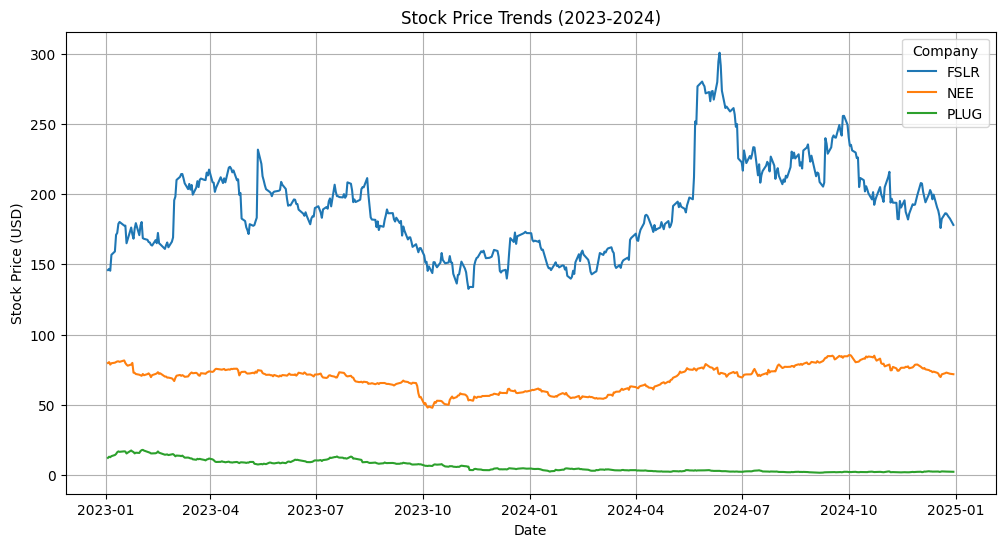

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='Date', y='Close', hue='Company')
plt.title('Stock Price Trends (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend(title='Company')
plt.grid()
plt.show()

The line graph illustrates the contrasting stock price trajectories over the 2023-2024 period, reflecting their varying market performance.

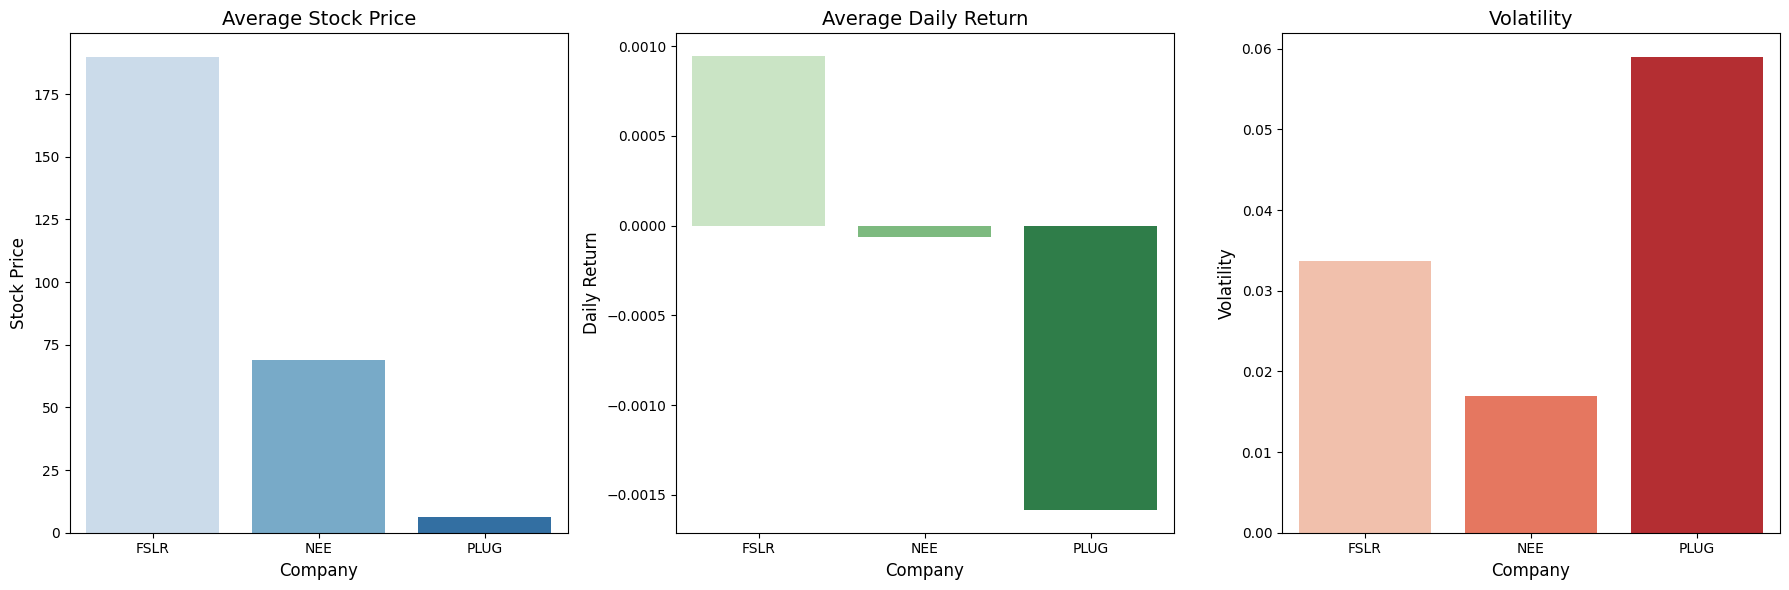

In [38]:
# Company-Wise Performance Summary
summary_data = combined_data.groupby('Company').agg({
    'Close': 'mean',  
    'Daily_Return': ['mean', 'std'] 
}).reset_index()

# Flattening the MultiIndex columns
summary_data.columns = ['Company', 'Avg Stock Price', 'Avg Daily Return', 'Volatility']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Avg Stock Price
sns.barplot(data=summary_data, x='Company', y='Avg Stock Price', ax=axes[0], palette="Blues")
axes[0].set_title('Average Stock Price', fontsize=14)
axes[0].set_xlabel('Company', fontsize=12)
axes[0].set_ylabel('Stock Price', fontsize=12)

# Avg Daily Return
sns.barplot(data=summary_data, x='Company', y='Avg Daily Return', ax=axes[1], palette="Greens")
axes[1].set_title('Average Daily Return', fontsize=14)
axes[1].set_xlabel('Company', fontsize=12)
axes[1].set_ylabel('Daily Return', fontsize=12)

# Volatility
sns.barplot(data=summary_data, x='Company', y='Volatility', ax=axes[2], palette="Reds")
axes[2].set_title('Volatility', fontsize=14)
axes[2].set_xlabel('Company', fontsize=12)
axes[2].set_ylabel('Volatility', fontsize=12)

plt.tight_layout()
plt.show()

This multi-metric analysis provides a comprehensive overview of each company's performance.

# Seasonal Performance

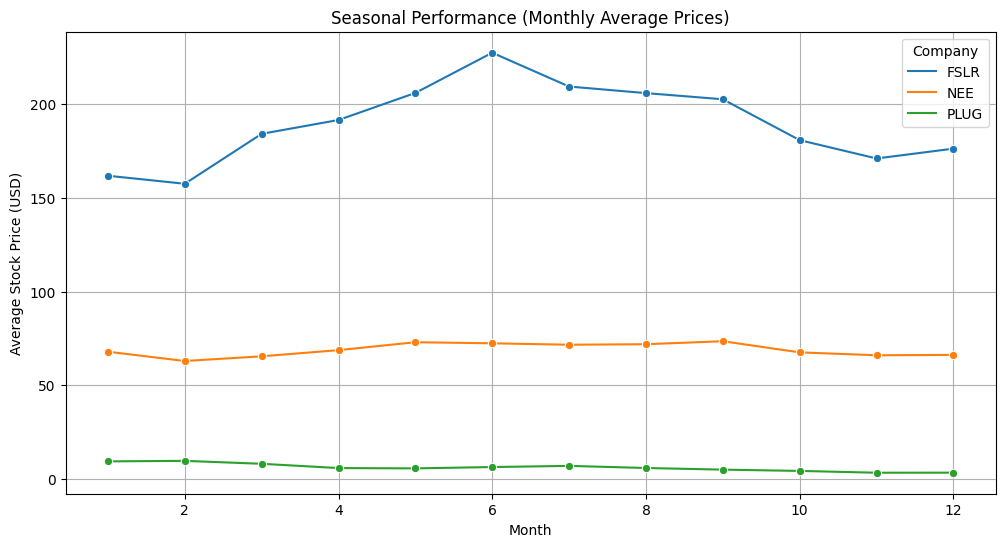

In [39]:
monthly_avg = combined_data.groupby(['Company', 'Month'])['Close'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Close', hue='Company', marker='o')
plt.title('Seasonal Performance (Monthly Average Prices)')
plt.xlabel('Month')
plt.ylabel('Average Stock Price (USD)')
plt.legend(title='Company')
plt.grid()
plt.show()

This line graph depicts the average monthly stock prices for FSLR, NEE, and PLUG throughout 2023 and 2024, revealing potential seasonal trends with FSLR and NEE potentially experiencing higher prices in Q2 and Q3, while PLUG's prices seem less influenced by seasonality.

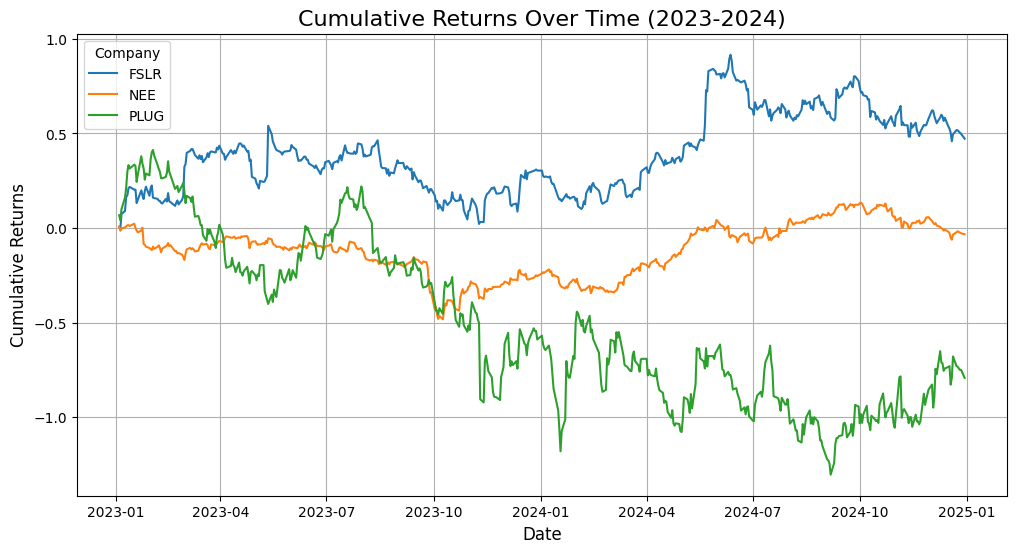

In [40]:
combined_data['Cumulative_Return'] = combined_data.groupby('Company')['Daily_Return'].cumsum()
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='Date', y='Cumulative_Return', hue='Company')
plt.title('Cumulative Returns Over Time (2023-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.legend(title='Company', fontsize=10)
plt.grid()
plt.show()

The graph illustrates the cumulative returns for each company. FSLR shows strong upward growth, NEE exhibits moderate gains, and PLUG displays significant negative returns, reinforcing the investment recommendations.

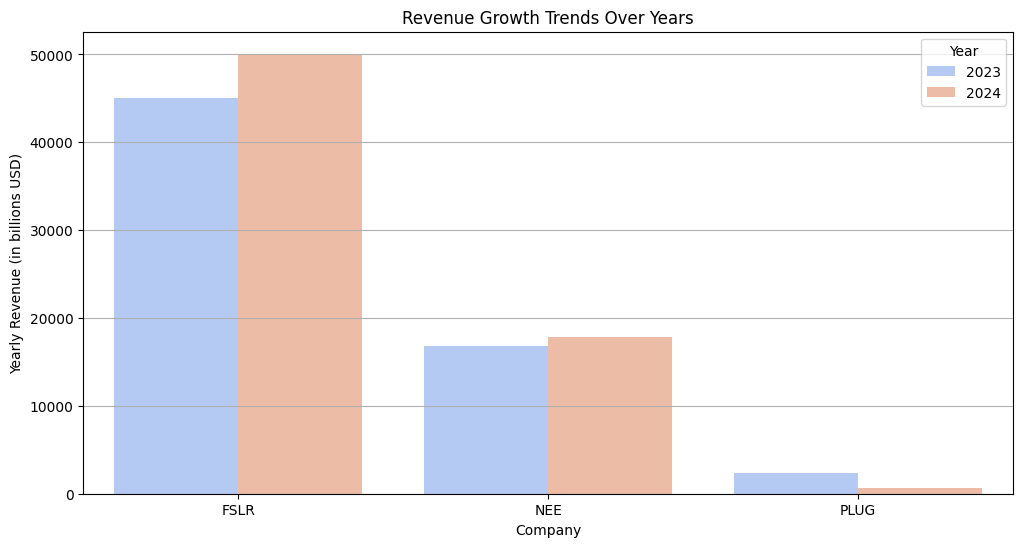

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_data.groupby(['Company', 'Year'])['Close'].sum().reset_index(), 
            x='Company', y='Close', hue='Year', palette='coolwarm')
plt.title('Revenue Growth Trends Over Years')
plt.xlabel('Company')
plt.ylabel('Yearly Revenue (in billions USD)')
plt.legend(title='Year')
plt.grid(axis='y')
plt.show()

An analysis of the average stock price for each company from 2023 to 2024, shows an increase for FSLR and NEE, while PLUG experienced a significant decline. FSLR showed a significant increase from $179.96 to $199.55, indicating strong performance. NEE experienced a slight increase from $67.05 to $70.93, while PLUG experienced a significant decline from $9.59 to $2.74, highlighting the challenges faced by the company.

# Investment Recommendation

In [42]:
# Total returns over the period
total_returns = combined_data.groupby('Company').apply(
    lambda x: (x['Close'].iloc[-1] - x['Close'].iloc[0]) / x['Close'].iloc[0]
).reset_index()
total_returns.columns = ['Company', 'Total_Return']

In [43]:
total_returns['Recommendation'] = total_returns['Total_Return'].apply(
    lambda x: 'Buy' if x > 0.2 else 'Hold' if 0 <= x <= 0.2 else 'Sell'
)

print("\nInvestment Recommendations")
total_returns


Investment Recommendations


,Company,Total_Return,Recommendation
0,FSLR,0.220159,Buy
1,NEE,-0.100211,Sell
2,PLUG,-0.812808,Sell


#### 1.	Buy First Solar, Inc. (FSLR):
-	Consistent revenue growth, profitability, and leadership in thin-film technology make First Solar a solid investment.
-	This is further supported by the calculation yielding a total return of 22%, indicating strong investment potential. The analysis of ROE and Debt-to-Equity ratios aligns with this. While the Debt-to-Equity ratio indicates some financial leverage, FSLR demonstrates a healthy level of profitability.
-	The company's consistent revenue growth and moderate market risk make it an attractive option for investors.
#### 2.	Sell NextEra Energy, Inc. (NEE):
-	Stable financials and diversified operations offer security, but regulatory uncertainties warrant caution.
-	A total return of -10% is seem.
-	While NEE has a strong market position, the high debt levels and potential regulatory uncertainties warrant a more cautious approach.
#### 3.	Sell Plug Power Inc. (PLUG):
-	Persistent financial losses and high market competition make Plug Power a risky investment.
-	A total return of -81% is unfortunately noted.

# Conclusion 
The renewable energy sector offers immense opportunities for growth and innovation, but investors must carefully evaluate each company’s risk profile. 

Strategic investments in leaders like **First Solar** can yield strong returns, contributing to both financial gain and environmental progress.